In [2]:
# ID2024112716501499101184
from tshpo.automl_libs import *

files = [
    "c07_tshpo_effect_of_atop_in_small_middle_original_20241105_0947.csv.gz",
]

t_df = []
for _f in files:
    t_df.append(AnaHelper.load_exp_from_csv_tshpo(_f, iterations=[4000]))

process_df = pd.concat(t_df)
process_df

Parse configs


,Unnamed: 0,id,default_max,default_min,status,#instances,model_training_time,data_processing_time,walk_time,t__stopwatch_,...,n_high_performing_model,n_samples_for_each_model,hpo_opt_method,max_samples,n_exploration,data_sample_method,data_sample_rate,hpc,parsed_configs_and_metrics,metric_4000
0,0,f897d051e5fd0ab655b77c2840bb924c,0.7488,0.1486,success,4000,2280.0298,0.2581,2283.11,2283.373731,...,1,NaN,RS,NaN,NaN,RS,0.9,NaN,config_index model default elapsed_sec...,0.8514
1,0,40cd9aae5eb396b6ca94976703c4f9e0,0.7865,0.1675,success,4000,1145.9195,0.2594,1148.35,1148.677311,...,2,NaN,RS,NaN,NaN,RS,0.9,NaN,config_index model default elaps...,0.8325
2,0,17e3c73bd168d5e33a2e0bc43e46c6cc,0.7603,0.2496,success,4000,2043.7408,0.1474,2047.25,2047.671243,...,3,NaN,RS,NaN,NaN,RS,0.9,NaN,config_index model default elap...,0.7504
3,0,6da52e16acd0cc882cc040553a68875a,0.7488,0.2381,success,4000,2155.3196,0.2344,2159.14,2159.415648,...,4,NaN,RS,NaN,NaN,RS,0.9,NaN,config_index model default elap...,0.7619
4,0,f2e6ce3ec6e5dc09f6ce159efff8a1fe,0.7225,0.2307,success,4000,1895.8449,0.1995,1899.89,1900.338258,...,5,NaN,RS,NaN,NaN,RS,0.9,NaN,config_index model defau...,0.7693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,0,00550795cb22f3e23d7596ef9211b375,0.7241,0.1389,success,4000,2576.9485,0.6541,2580.18,2580.513770,...,10,NaN,RS,NaN,NaN,RS,0.9,NaN,config_index model default el...,0.8611
3076,0,e2e4811da82ecde59cb91b748557a4be,0.7370,0.1352,success,4000,2567.0105,0.6256,2569.83,2570.200382,...,11,NaN,RS,NaN,NaN,RS,0.9,NaN,config_index model default el...,0.8648
3077,0,db710529605d65b3a4afe2a478ad02f5,0.7352,0.1389,success,4000,2143.4093,0.4432,2146.15,2146.506109,...,12,NaN,RS,NaN,NaN,RS,0.9,NaN,config_index model default el...,0.8611
3078,0,2292f86a2e9264811de4b4f3d1e4dbd4,0.7185,0.1352,success,4000,1798.3669,0.3624,1800.60,1800.950185,...,13,NaN,RS,NaN,NaN,RS,0.9,NaN,config_index model defau...,0.8648


In [3]:
METRIC_KEY = "metric_4000"
_df = process_df[(process_df['metric'] != "f1") & (process_df['hpo_opt_method'] == "RS")]
_ef_df = _df.groupby(by=["n_high_performing_model", "metric", "fold_index"])[METRIC_KEY].mean().reset_index()
_ef_df['metric'] = _ef_df['metric'].apply(lambda x: AnaHelper.normal_metric_name(x))
_ef_df

,n_high_performing_model,metric,fold_index,metric_4000
0,1,Accuracy,0,0.902764
1,1,Accuracy,1,0.887682
2,1,Accuracy,2,0.903150
3,1,Accuracy,3,0.891527
4,1,Accuracy,4,0.894250
...,...,...,...,...
135,14,ROC AUC,0,0.904127
136,14,ROC AUC,1,0.892609
137,14,ROC AUC,2,0.905559
138,14,ROC AUC,3,0.885255


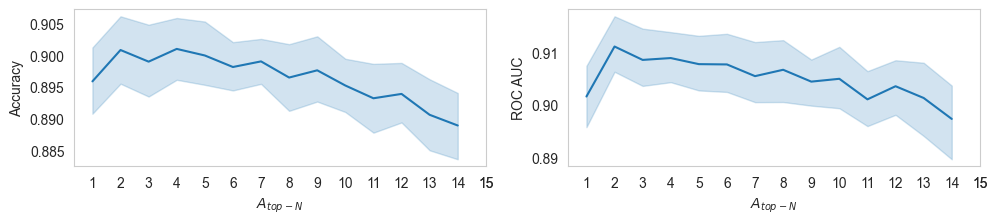

In [4]:
# ID2024102316341783479351
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import seaborn as sns

# FSM = "PCA"
# _ef_df=_ef_df[(_ef_df['n_high_performing_model']!=8)&(_ef_df['metric']=="ROC AUC")]
g = sns.FacetGrid(_ef_df, col="metric", height=2.5, aspect=2, despine=False, sharey=False)
g.map_dataframe(sns.lineplot, x="n_high_performing_model", y=METRIC_KEY, palette=sns.color_palette(),
                estimator="mean")
for _, ax in g.axes_dict.items():
    if str(ax.get_title()).find("AUC") > -1:
        # ax.set_ylim(0.8,0.90)
        ax.set_ylabel("ROC AUC")
    else:
        ax.set_ylabel("Accuracy")
        # ax.set_ylim(0.88,0.91)
    # ax.set_ylim(0.75,0.9)
    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 15]
    ax.set_xticks(labels, labels)
    ax.set_title(None)
    ax.set_xlabel("$A_{top-N}$")
    ax.grid(False)

plt.subplots_adjust(wspace=0.2)
g.savefig("effect_acc_sel_on_hpo_acc.pdf")